# ** DIscBIO: a user-friendly pipeline for biomarker discovery in single-cell transcriptomics**

The pipeline consists of four successive steps: data pre-processing, cellular clustering and pseudo-temporal ordering, determining differential expressed genes and identifying biomarkers.

![DIsccBIO](DiscBIO.png)

#                      CTC Notebook  [PART 4]

## Running the DIscBIO pipeline based on a list of genes related to Golgi Fragmentation
## [Data pre-processing and cell clustering]
                                                   

## Required Packages

In [1]:
library(DIscBIO)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

## Loading dataset


The "CTCdataset" dataset consisting of single migratory circulating tumor cells (CTCs) collected from patients with breast cancer. Data are available in the GEO database with accession numbers GSE51827, GSE55807, GSE67939, GSE75367, GSE109761, GSE111065 and GSE86978. The dataset should be formatted in a data frame where columns refer to samples and rows refer to genes. We provide here the possibility to load the dataset either as ".csv" or ".rda" extensions.The dataset should be formatted in a data frame where columns refer to samples and rows refer to genes. 
We provide here the possibility to load the dataset either as ".csv" or ".rda" extensions.

In [2]:
FileName<-"CTCdataset"        # Name of the dataset
#CSV=TRUE                     # If the dataset has ".csv", the user shoud set CSV to TRUE
CSV=FALSE                     # If the dataset has ".rda", the user shoud set CSV to FALSE

if (CSV==TRUE){
    DataSet <- read.csv(file = paste0(FileName,".csv"), sep = ",",header=T)
    rownames(DataSet)<-DataSet[,1]
    DataSet<-DataSet[,-1]
} else{
    load(paste0(FileName,".rda"))
    DataSet<-get(FileName)
}
cat(paste0("The ", FileName," contains:","\n","Genes: ",length(DataSet[,1]),"\n","cells: ",length(DataSet[1,]),"\n"))

The CTCdataset contains:
Genes: 13181
cells: 1462


### 1. Preparing the dataset

In [3]:
FG<- DISCBIO(DataSet)
FG<-Normalizedata(FG, mintotal=1000, minexpr=0, minnumber=0, maxexpr=Inf, downsample=FALSE, dsn=1, rseed=17000) 
FG<-FinalPreprocessing(FG,GeneFlitering="ExpF",export = TRUE)        # The GeneFiltering should be set to "ExpF"

GolgiFragGeneList<- read.csv(file = "GolgiFragGeneList.csv", sep = ",",header=F)
Data<-FG@fdata 
genes<-rownames(Data)
gene_list<- GolgiFragGeneList[,1]
idx_genes <- is.element(genes,gene_list)
OAdf<-Data[idx_genes,]   
FG@fdata<-OAdf
dim(FG@fdata)
cat(paste0("A list of ", length(OAdf[,1]), " genes will be used for the clustering","\n"))

The gene filtering method = Noise filtering

The Filtered Normalized dataset contains:
Genes: 13181
cells: 1448



The Filtered Normalized dataset was saved as: filteredDataset.Rdata



[1]   97 1448

A list of 97 genes will be used for the clustering


### 2. Cellular Clustering and Pseudo Time ordering

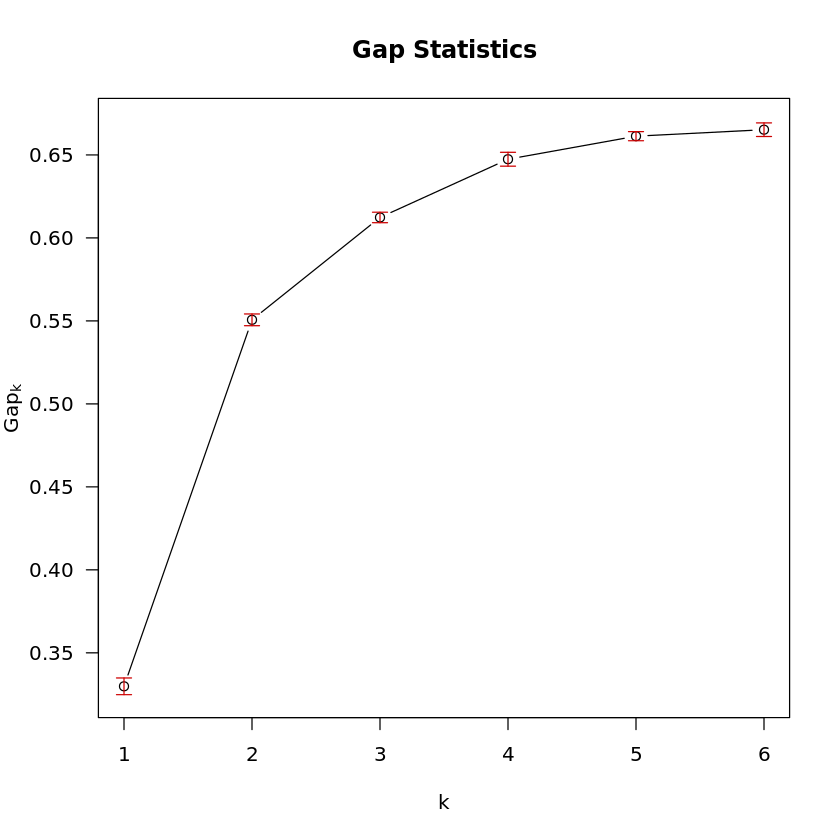

In [4]:
load("fg.RData")               # Loading the "fg" object that includes the data of the k-means clustering 
FG<-fg                         # Storing the data of fg in the FG 
########## Removing the unneeded objects
rm(DataSet)
rm(fg)
rm(Data)
rm(OAdf)

plotGap(FG)                                               ### Plotting gap statistics

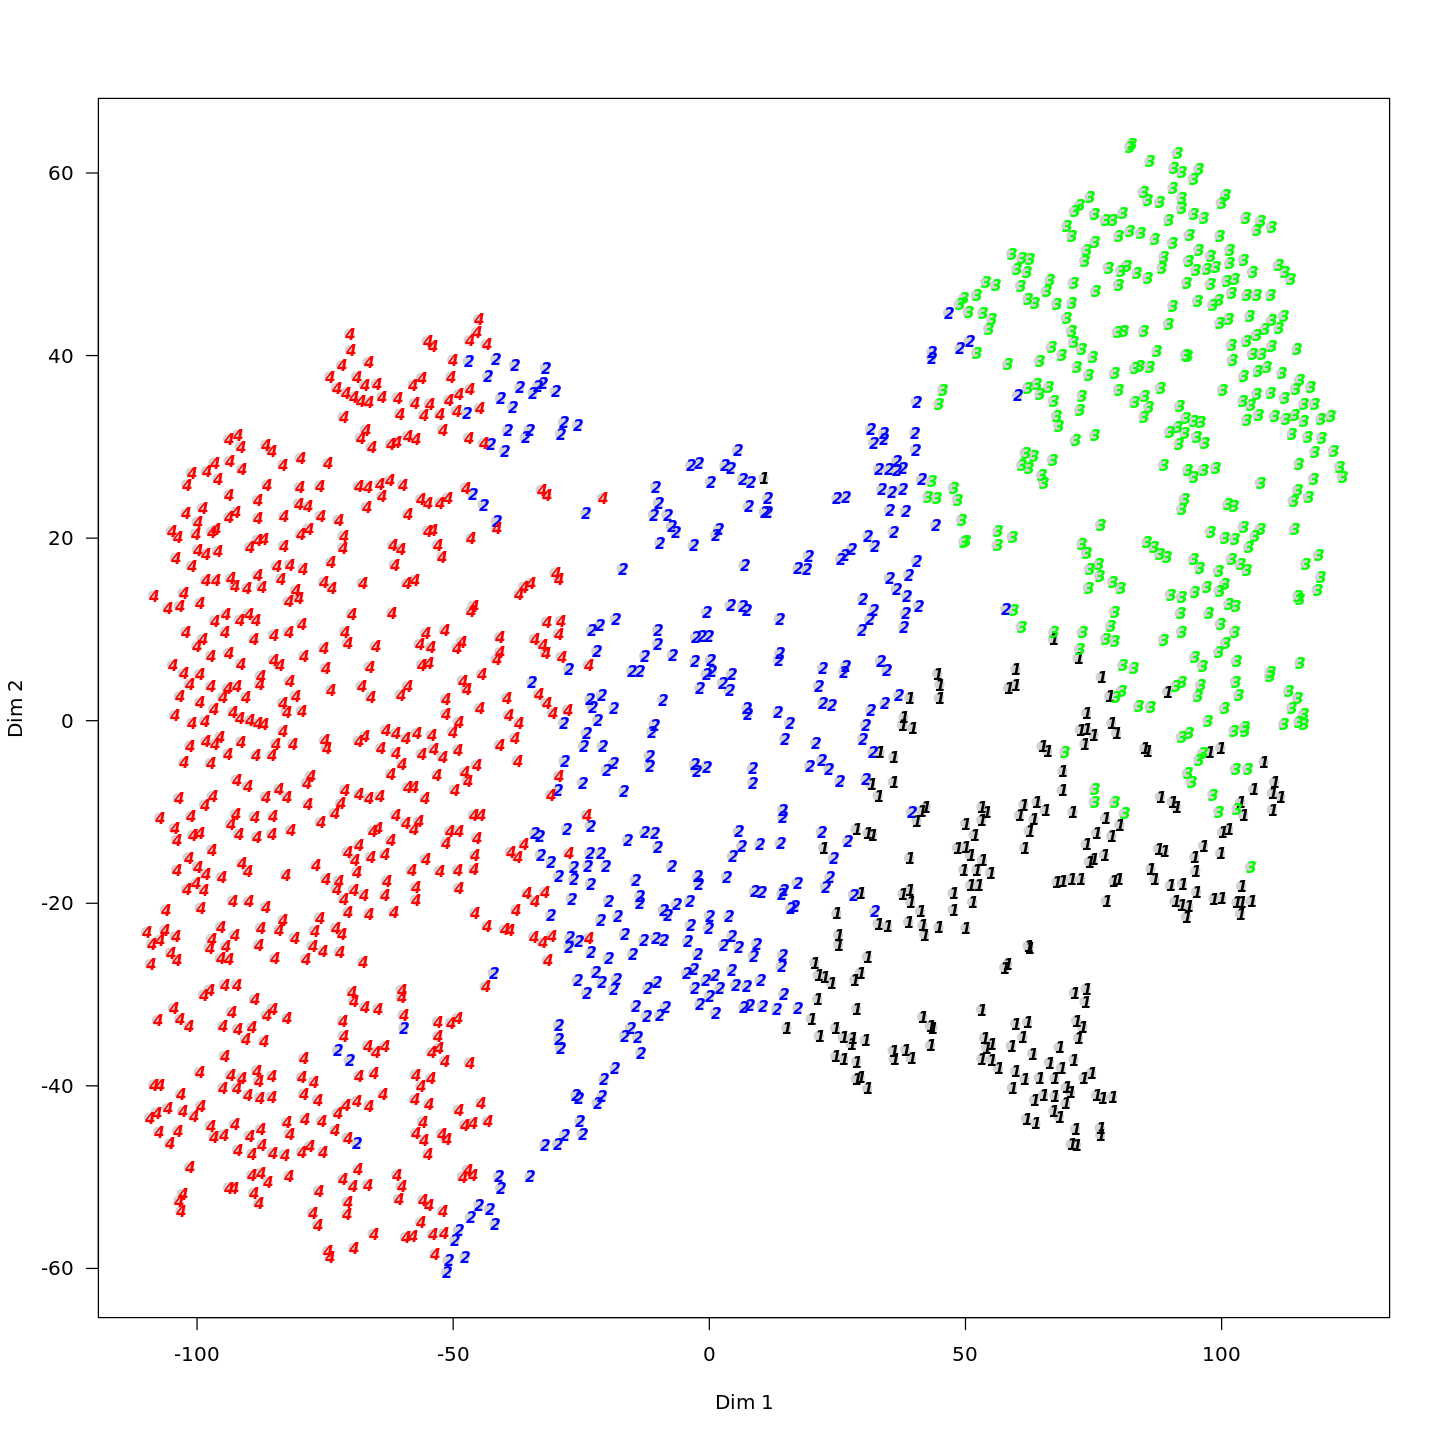

In [5]:
############ Plotting the clusters
withr::with_options(repr.plot.width=12, repr.plot.height=12)
plottSNE(FG)

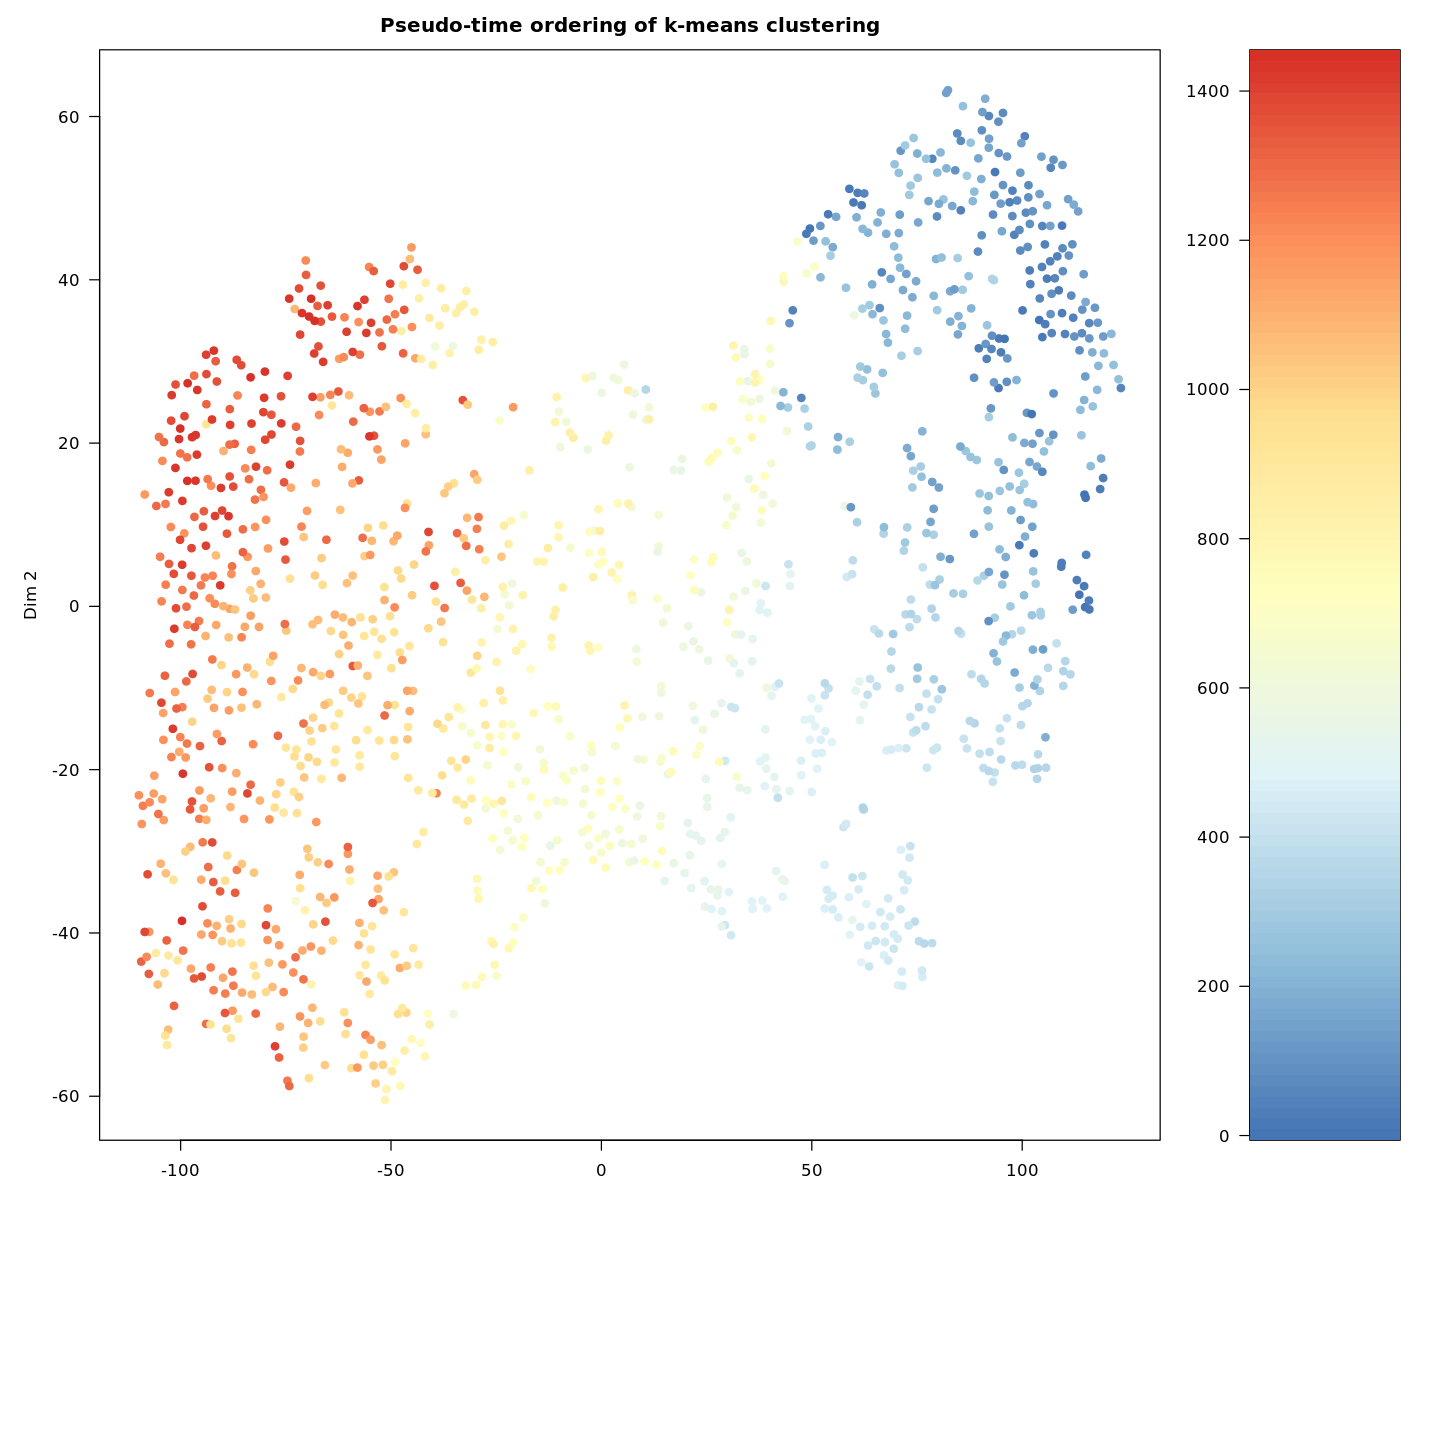

In [6]:
FG<-pseudoTimeOrdering(FG,quiet = TRUE, export = FALSE)
plotOrderTsne(FG)

####  Evaluating the stability and consistancy of the clusters

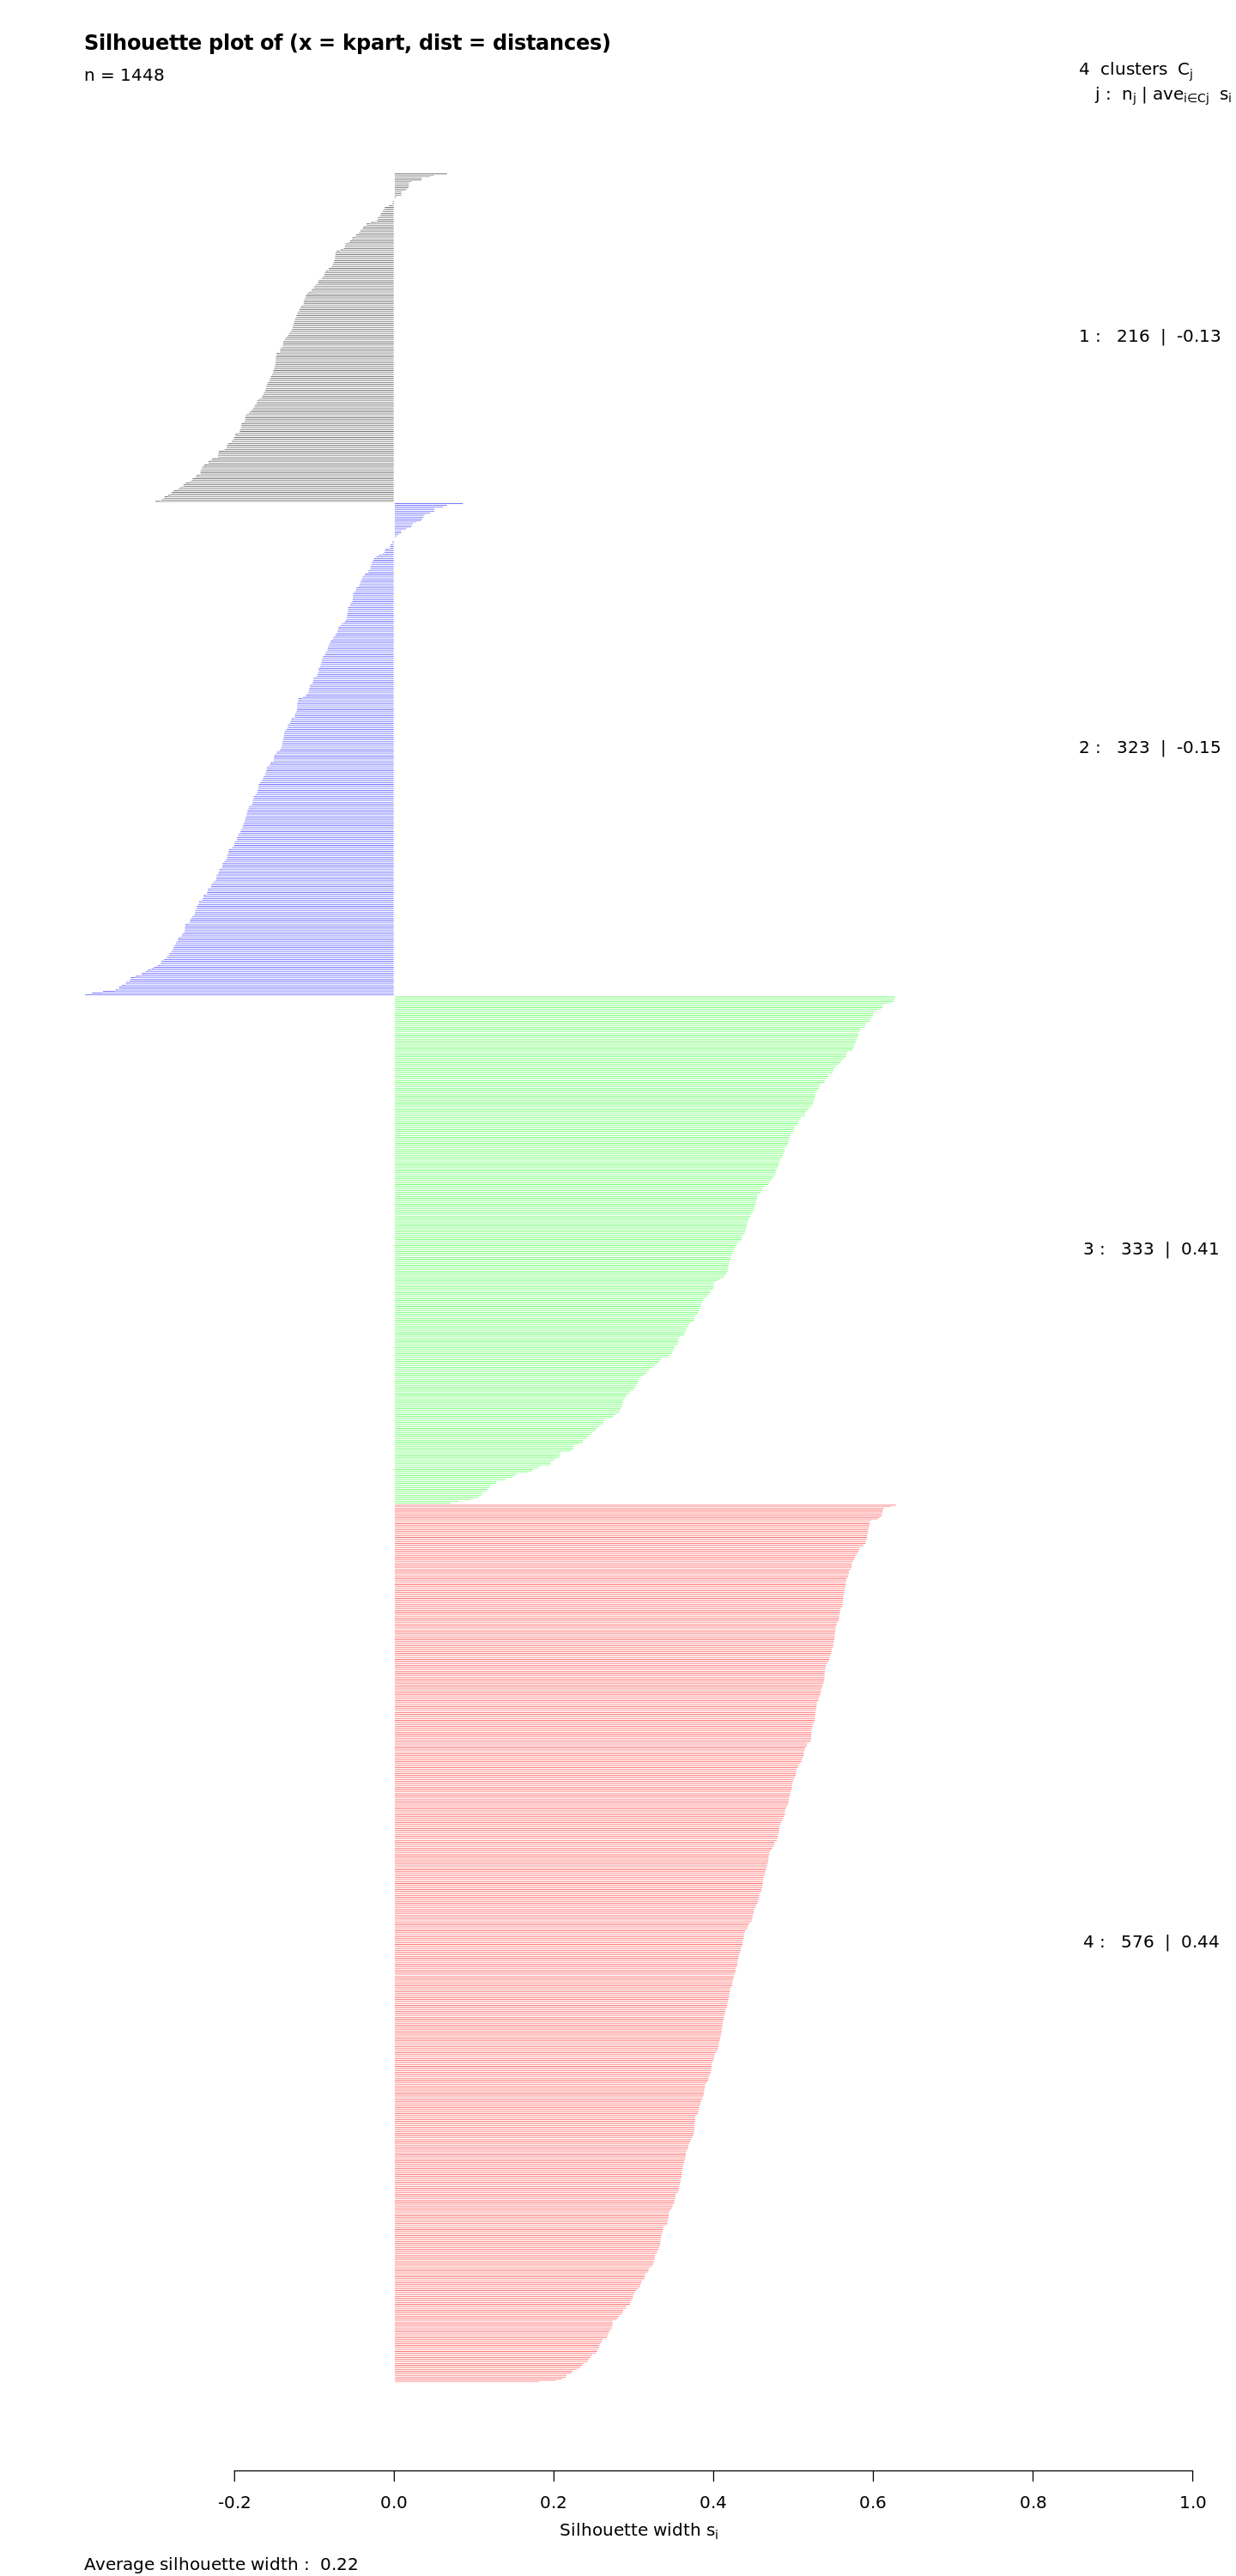

In [7]:
# Silhouette plot
withr::with_options(repr.plot.width=12, repr.plot.height=25)
plotSilhouette(FG,K=4)       # K is the number of clusters

[1] 0.749 0.671 0.545 0.772

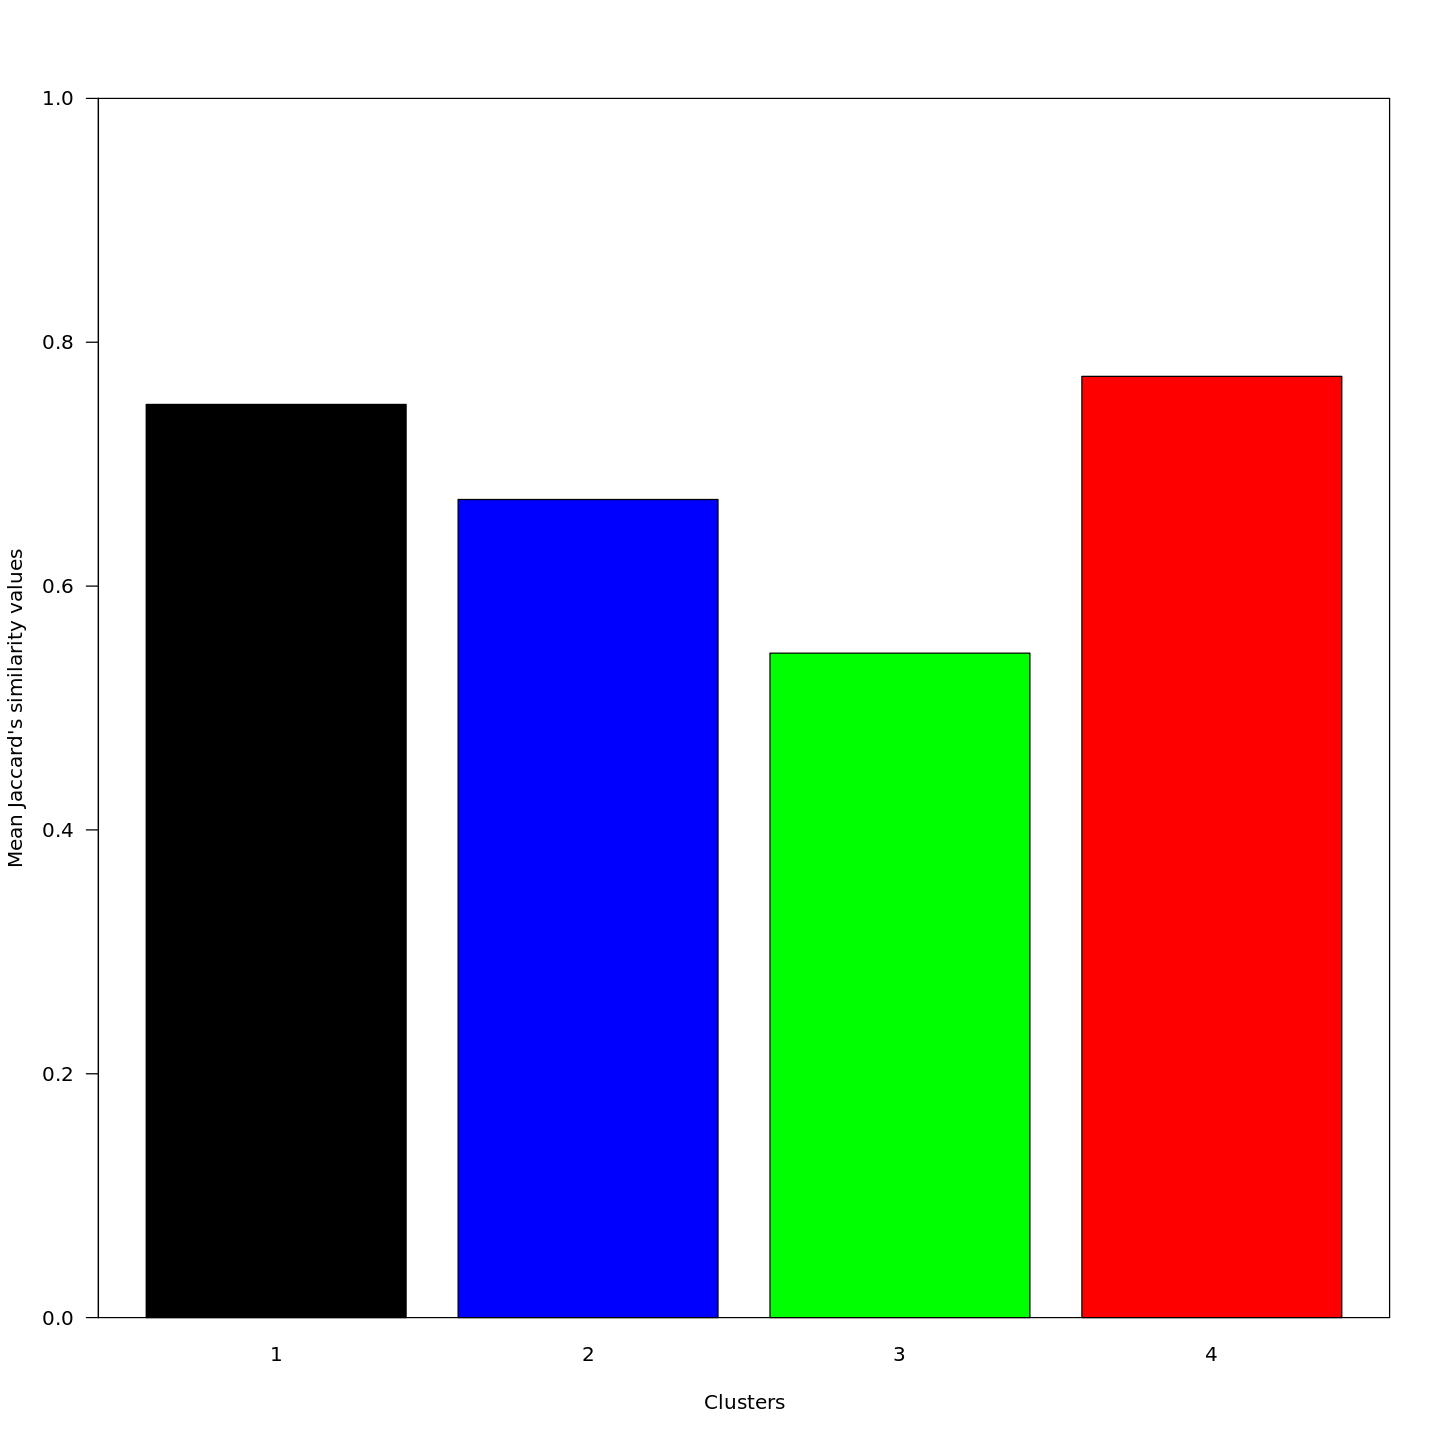

In [8]:
# Jaccard Plot
withr::with_options(repr.plot.width=12, repr.plot.height=12)
Jaccard(FG,Clustering="K-means", K=4, plot = TRUE)     # Jaccard 

####  Plotting the gene expression of a particular gene in a tSNE map

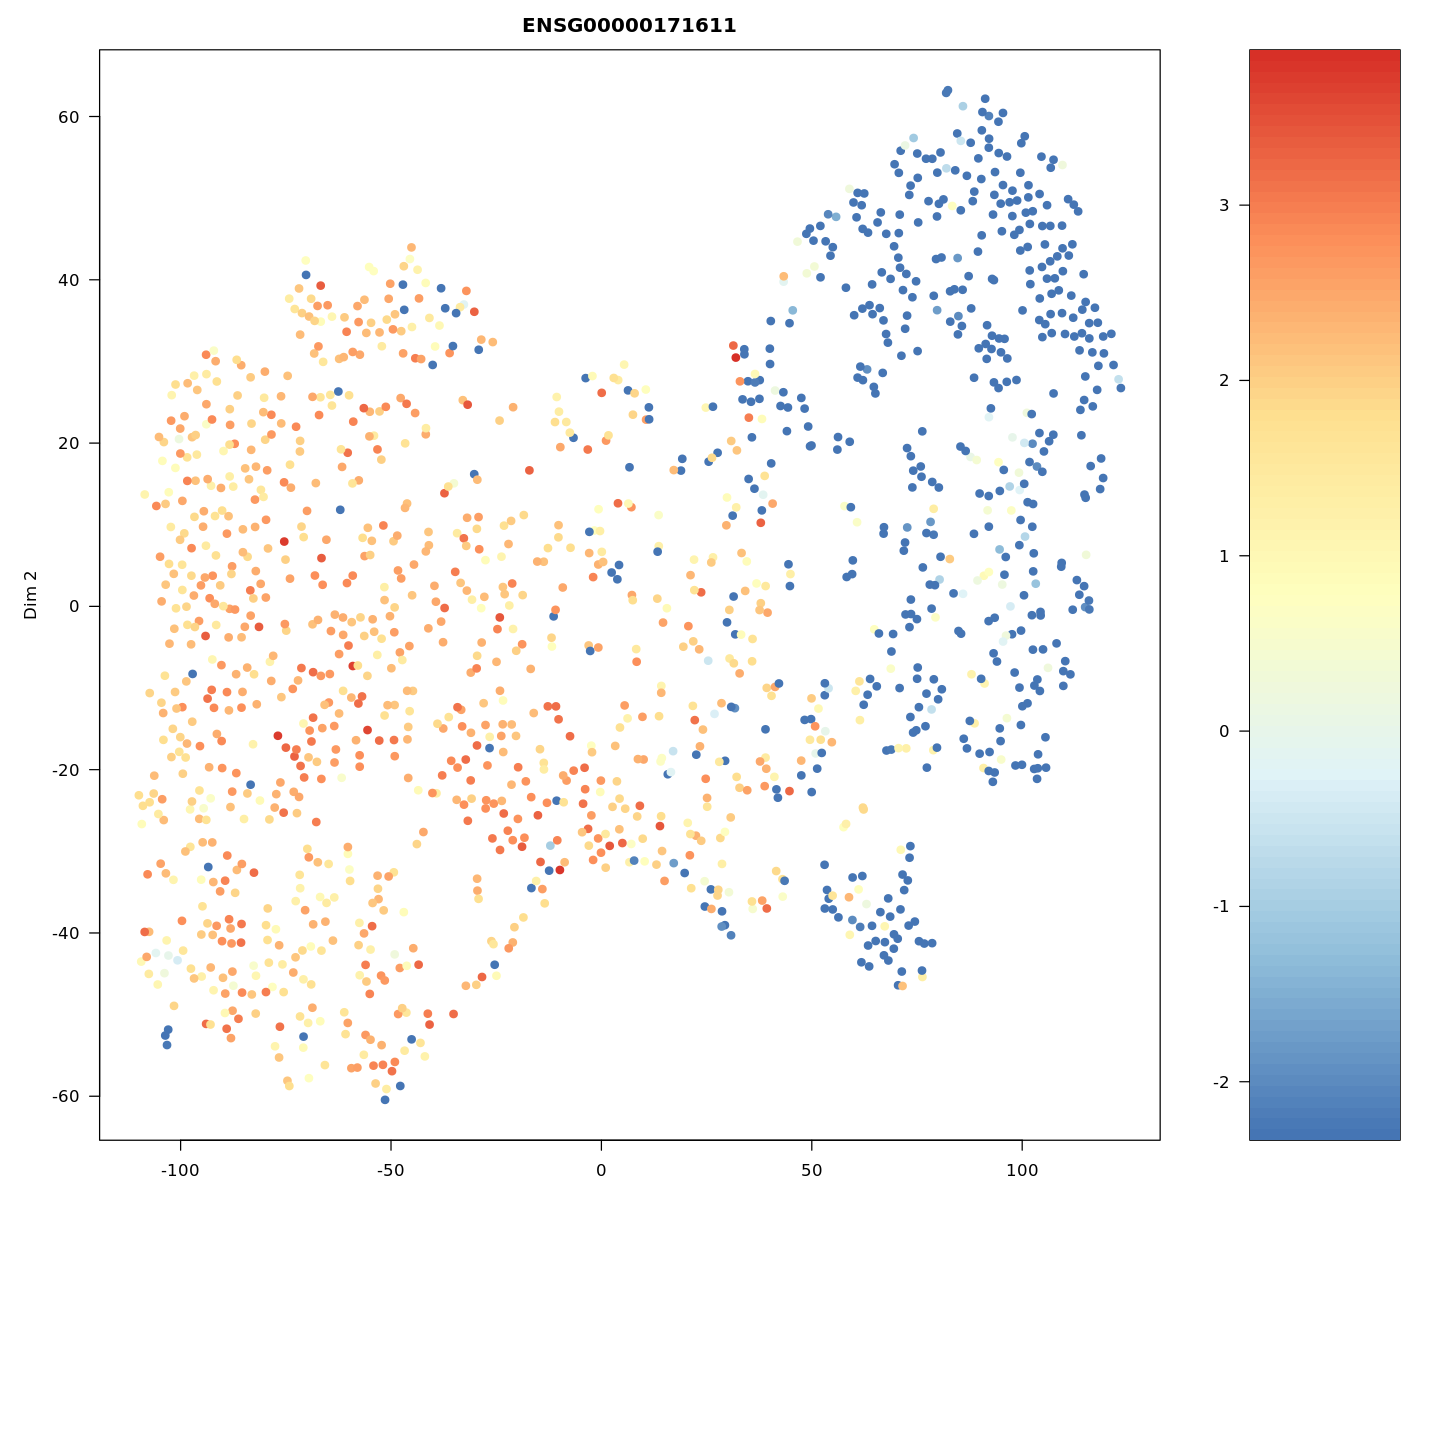

In [9]:
g='ENSG00000171611'                   #### Plotting the log expression of  PTCRA 
plotExptSNE(FG,g)

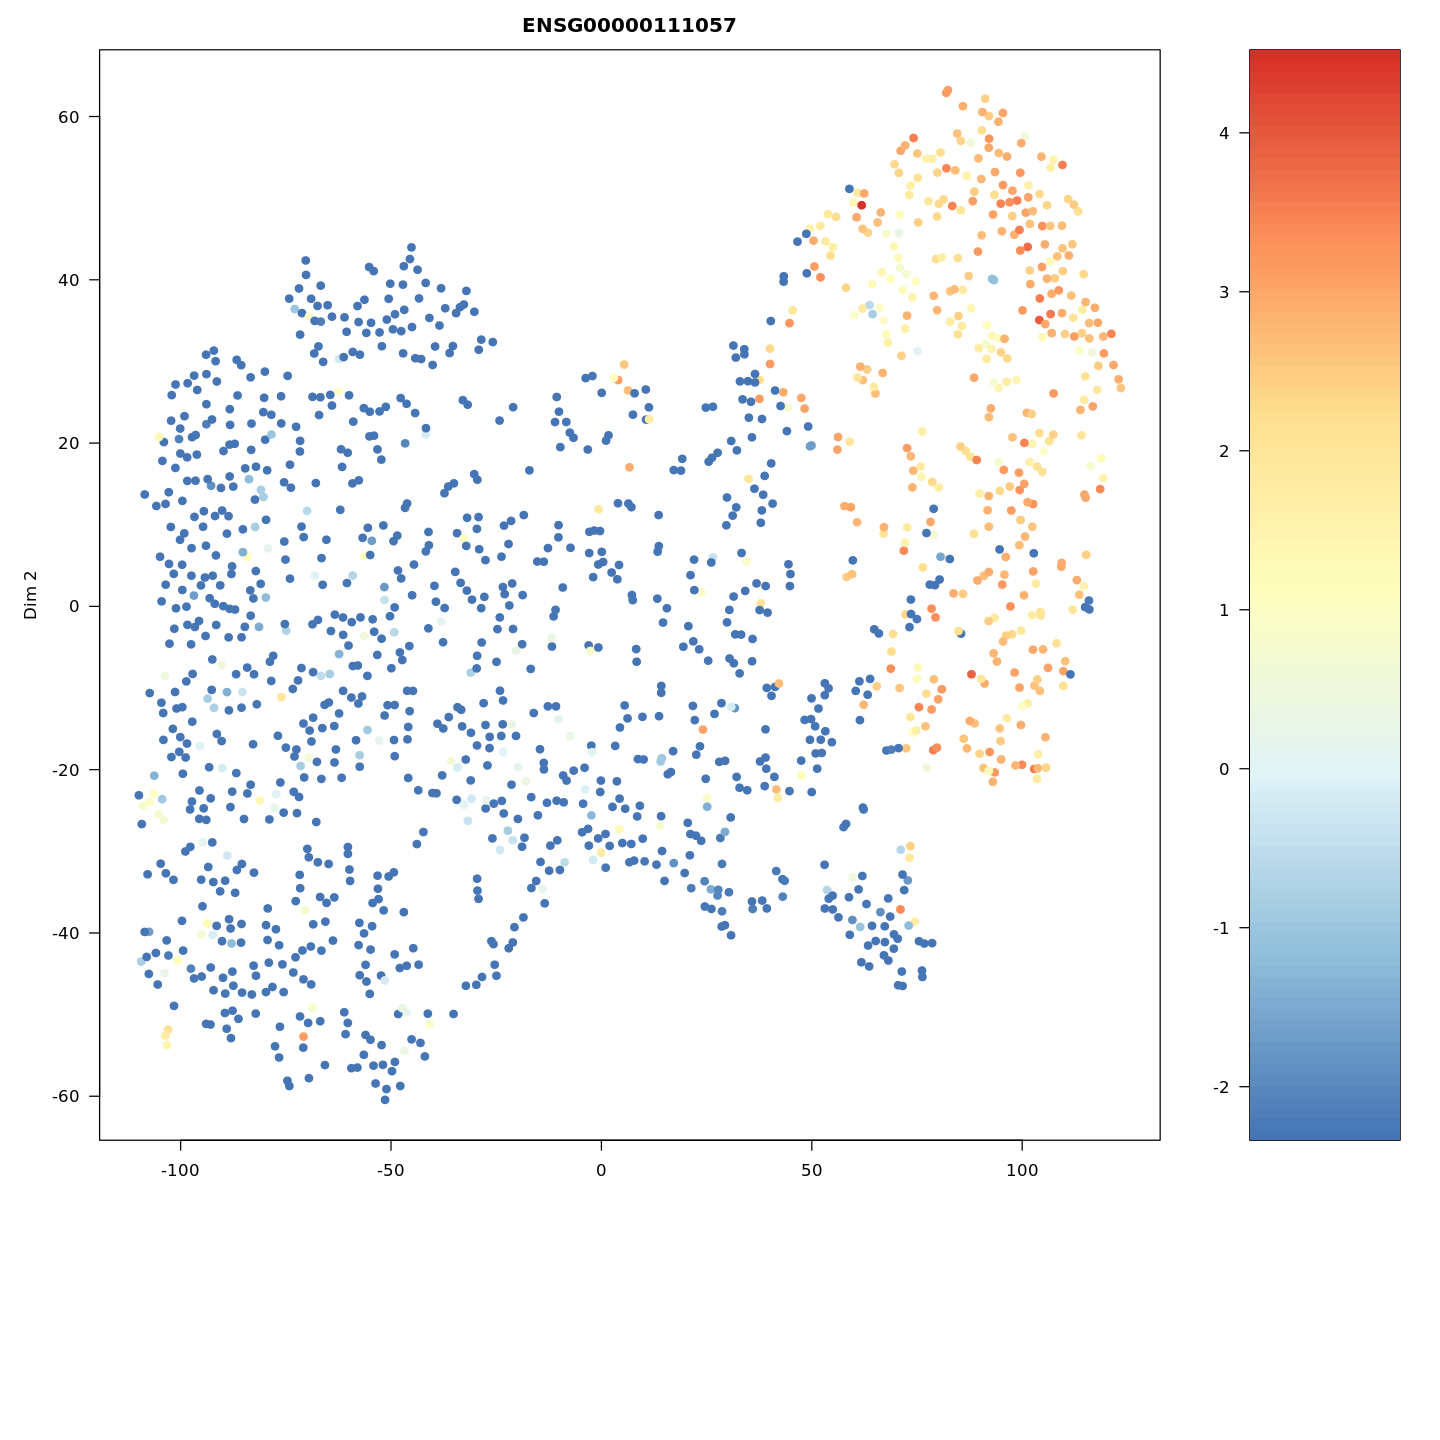

In [10]:
g='ENSG00000111057'                   #### Plotting the log expression of  KRT18  
plotExptSNE(FG,g)